Installing TensorFlow

In [5]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Importing in libraries

In [2]:
# First, we need to import the recommended libraries in order to load and visualise the CIFAR-10 dataset.

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading in the dataset

In [732]:
#next we want to download CIFAR-10 dataset from Keras in order to prepare the data for analysis and exploration

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [735]:
# Split the original training data into training and validation sets.

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
# Reshape (flatten) the input data

In [9]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (num_samples, 3072)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)  # Shape: (num_samples, 3072)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Shape: (num_samples, 3072)

In [737]:
# Now we will be printing out the dimensions of our training, validation and test datasets.

In [10]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


In [739]:
#now we will look at the overview of the CIFAR-10 dataset

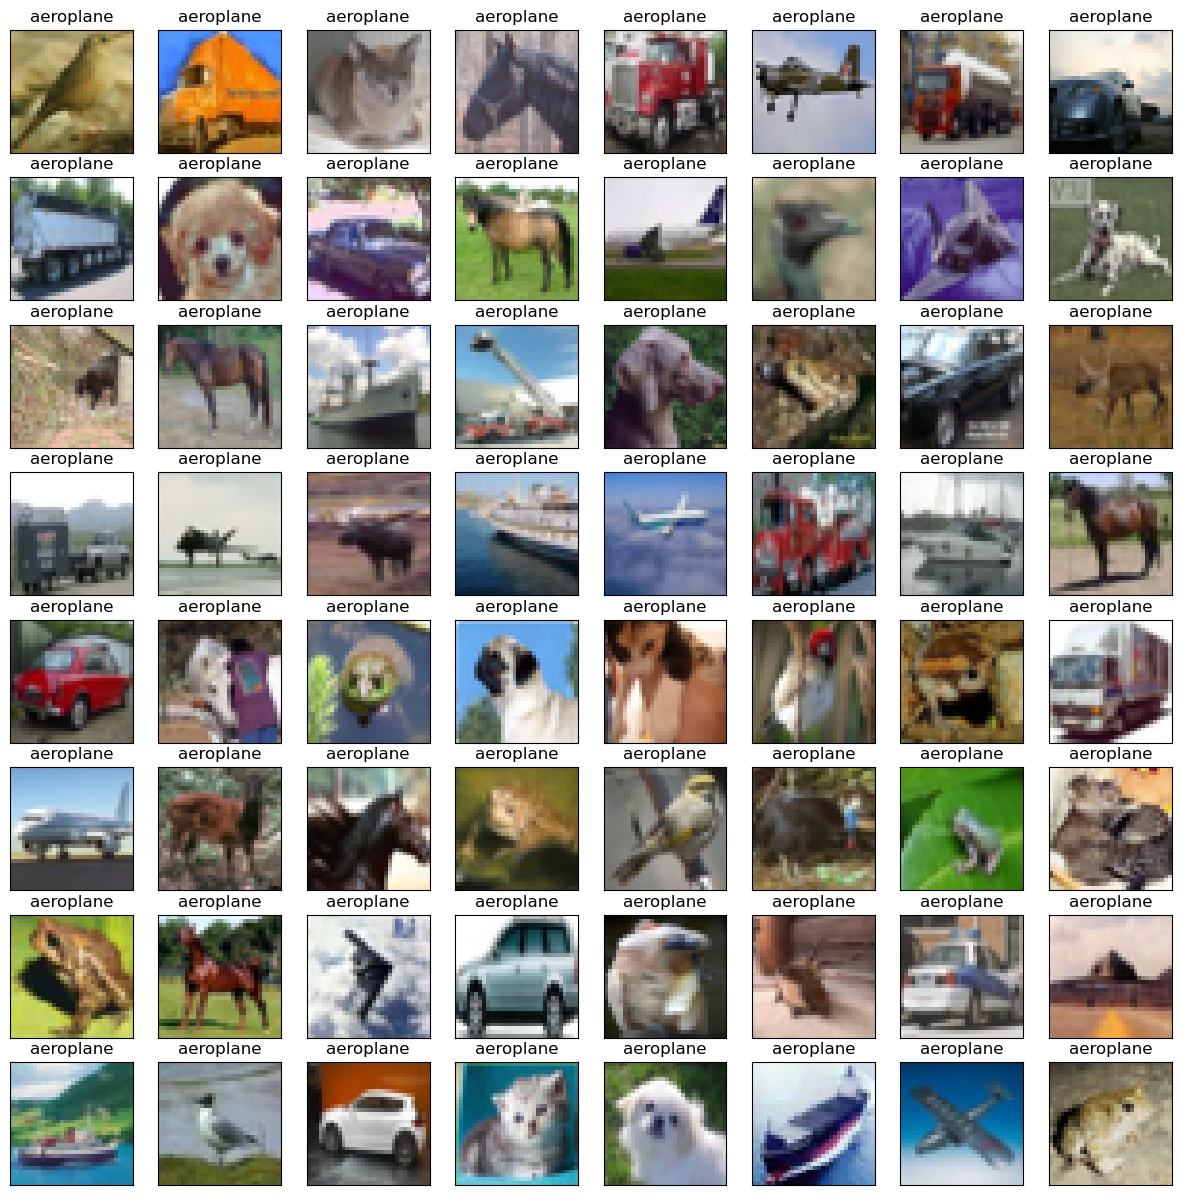

In [11]:
# #CIFAR-10 classes:
# class_names = ["aeroplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# #create new figure
# plt.figure(figsize = (15,15))

# # Loop over the first 64 images
# for i in range(64):
#     # Create a subplot for each image
#     plt.subplot(8, 8, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)

#     # Display the image
#     plt.imshow(X_train[i])

#     # Set the label as the title
#     plt.title(class_names[y_train[i][0]], fontsize=12)

# # Display the figure
# plt.show()

# CIFAR-10 classes
class_names = ["aeroplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Create a new figure
plt.figure(figsize=(15, 15))

# Loop over the first 64 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Reshape the flattened image back to (32, 32, 3) if necessary
    img = X_train[i].reshape(32, 32, 3) if X_train[i].shape == (3072,) else X_train[i]
    
    # Display the image
    plt.imshow(img)

    # Set the label as the title
    plt.title(class_names[np.argmax(y_train[i])], fontsize=12)

# Display the figure
plt.show()


implementing softmax with backward and forward pass

In [12]:
# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-Entropy Loss
"""def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))"""
def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Initialize weights and biases
def initialize_weights(input_size, output_size):
    weights = np.random.randn(input_size, output_size) * np.sqrt(2.0 / input_size)  # He initialization
    biases = np.zeros((1, output_size))
    return weights, biases
    

# Derivative of softmax with cross-entropy
def softmax_cross_entropy_backward(y_true, y_pred):
    return (y_pred - y_true) / y_true.shape[0]

# Forward and Backward Pass for Softmax
def softmax_forward_backward(x, y, weights, biases, learning_rate=0.01):
    # Forward pass
    z = np.dot(x, weights) + biases
    a = softmax(z)

    # Cross-entropy loss
    loss = cross_entropy_loss(y_train_one_hot, a)

    # Backward pass
    d_a = softmax_cross_entropy_backward(y, a)
    d_weights = np.dot(x.T, d_a)
    d_biases = np.sum(d_a, axis=0, keepdims=True)

    # Update weights and biases
    weights -= learning_rate * d_weights
    biases -= learning_rate * d_biases

    return loss, weights, biases

implementing sigmoid function with forward and backward pass

Epoch 1/10, Loss: 2.1306
Epoch 2/10, Loss: 1.9796
Epoch 3/10, Loss: 1.9254
Epoch 4/10, Loss: 1.8939
Epoch 5/10, Loss: 1.8724
Epoch 6/10, Loss: 1.8565
Epoch 7/10, Loss: 1.8440
Epoch 8/10, Loss: 1.8337
Epoch 9/10, Loss: 1.8251
Epoch 10/10, Loss: 1.8176


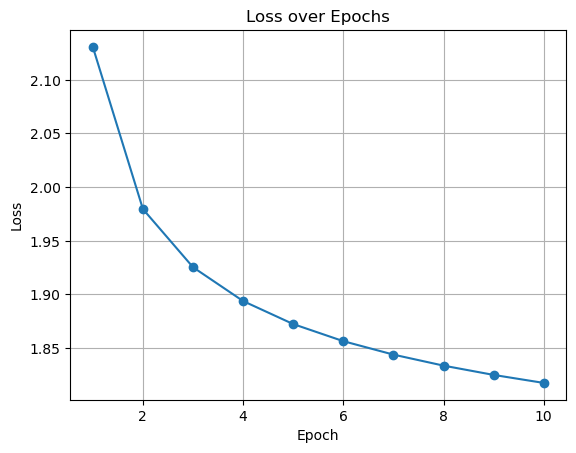

In [13]:
"""# Convert integer labels to one-hot encoded labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_valid_one_hot = to_categorical(y_valid, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)"""

#define the sigmoid activation function
def sigmoid(x):
    s = 1 / 1 + (np.exp(-x))
    return s

#define the derivative of sigmoid
def sigmoid_derivative(x):
    ds = x * (1-x)
    return ds

# Initialize weights and biases
"""def initialize_weights(input_size, output_size):
    weights = np.random.randn(input_size, output_size) * 0.01
    biases = np.zeros((1, output_size))
    return weights, biases"""
def initialize_weights(input_size, output_size):
    weights = np.random.randn(input_size, output_size).astype(np.float32) * np.sqrt(2.0 / input_size)
    biases = np.zeros((1, output_size), dtype =np.float32)
    return weights, biases

#define forward and backward pass/ propagation for the sigmoid function
def forward_backward_pass(x, y, weights, biases, learning_rate=0.001):
    # Forward pass
    z = np.dot(x, weights) + biases
    a = softmax(z)
    #return loss, weights, biases

    loss = cross_entropy_loss(y,a)
    
    # Loss (mean squared error for simplicity)
    #loss = np.mean((y - a) ** 2)
    
    # Cross-entropy loss
    #print("y: ", y)
    #print("log: " , np.log(a + 1e-15))
    #loss = -np.mean(np.sum(y * np.log(a + 1e-15), axis=1))
    """def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))"""
    
    # Backward pass
    """d_loss = 2 * (a - y) / y.size  # Derivative of loss with respect to a
    d_a = d_loss * sigmoid_derivative(a)  # Derivative of sigmoid activation
    
    d_weights = np.dot(x.T, d_a)  # Derivative w.r.t weights
    d_biases = np.sum(d_a, axis=0, keepdims=True)  # Derivative with respect to biases"""
    d_loss = (a - y).astype(np.float32) / y.shape[0]  # Gradient of loss with respect to predictions
    d_weights = np.dot(x.T, d_loss) / x.shape[0]  # Gradient w.r.t weights
    d_biases = np.sum(d_loss, axis=0, keepdims=True) / x.shape[0]  # Gradient w.r.t biases
    
    # Update weights and biases
    weights -= learning_rate * d_weights
    biases -= learning_rate * d_biases
    
    return loss, weights, biases

# Training
def train(x_train, y_train, input_size, output_size, epochs=10, batch_size = 64, learning_rate=0.01):
    weights, biases = initialize_weights(input_size, output_size)
    losses = [] # initialize the list to track losses over epochs.
    
    """for epoch in range(epochs):
        loss, weights, biases = forward_backward_pass(x_train, y_train, weights, biases, learning_rate)
        losses.append(loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")"""
    num_batches = x_train.shape[0] // batch_size
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(num_batches):
            # Create mini-batches
            start = i * batch_size
            end = start + batch_size
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            # Forward and backward pass
            loss, weights, biases = forward_backward_pass(x_batch, y_batch, weights, biases, learning_rate)
            epoch_loss += loss

        # Record and print the average loss for the epoch
        losses.append(epoch_loss / num_batches)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {losses[-1]:.4f}")
    
    return weights, biases, losses

# Set hyperparameters
# input_size = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]  # Flattened size of CIFAR-10 images (3072)
input_size = 32 * 32 * 3
output_size = 10  # Number of classes
epochs = 10
batch_size = 64
learning_rate = 0.1

# Preprocess data: Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32) / 255.0  # Flatten to 1D and normalize
X_valid = X_valid.reshape(X_valid.shape[0], -1).astype(np.float32) / 255.0  # Flatten to 1D and normalize
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32) / 255.0    # Flatten to 1D and normalize

# y_train = np.eye(10)[y_train.flatten()]  # One-hot encode labels
# y_valid = np.eye(10)[y_valid.flatten()]  # One-hot encode labels
# y_test = np.eye(10)[y_test.flatten()]    # One-hot encode labels

y_train = np.eye(10)[y_train.flatten().astype(int)]
y_valid = np.eye(10)[y_valid.flatten().astype(int)]
y_test = np.eye(10)[y_test.flatten().astype(int)]

# Train the model
weights, biases, losses = train(X_train, y_train, input_size, output_size, epochs, batch_size, learning_rate)

# Plot the loss graph
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid()
plt.show()

In [743]:
"""def plot_loss_curve(epochs, loss_values):
    
    #Plots the loss curve (Epoch vs. Loss).

    #Parameters:
        #epochs: list of epoch numbers.
        #loss_values: list of loss values corresponding to each epoch.
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_values, marker='o', color='blue', label='Training Loss')
    plt.title("Epoch vs Loss", fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()

# Store losses and epochs
loss_values = []
epoch_numbers = []

for epoch in range(epochs):
    # Forward pass
    z = np.dot(X_train_flat, weights) + biases
    a = softmax(z)

    # Compute loss
    loss = cross_entropy_loss(y_train_one_hot, a)
    loss_values.append(loss)  # Append loss for the current epoch
    epoch_numbers.append(epoch + 1)  # Append the current epoch number

    # Backward pass
    d_a = softmax_cross_entropy_backward(y_train_one_hot, a)
    d_weights = np.dot(X_train_flat.T, d_a)
    d_biases = np.sum(d_a, axis=0, keepdims=True)

    # Update weights (using SGD or SGD with momentum)
    weights, biases, velocity_weights, velocity_biases = sgd_momentum_update(
        weights, biases, d_weights, d_biases, velocity_weights, velocity_biases, learning_rate, momentum
    )

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

# Plot the loss curve
plot_loss_curve(epoch_numbers, loss_values)"""

'def plot_loss_curve(epochs, loss_values):\n    \n    #Plots the loss curve (Epoch vs. Loss).\n\n    #Parameters:\n        #epochs: list of epoch numbers.\n        #loss_values: list of loss values corresponding to each epoch.\n    \n    plt.figure(figsize=(10, 6))\n    plt.plot(epochs, loss_values, marker=\'o\', color=\'blue\', label=\'Training Loss\')\n    plt.title("Epoch vs Loss", fontsize=16)\n    plt.xlabel("Epochs", fontsize=14)\n    plt.ylabel("Loss", fontsize=14)\n    plt.grid(True, linestyle=\'--\', alpha=0.7)\n    plt.legend(fontsize=12)\n    plt.show()\n\n# Store losses and epochs\nloss_values = []\nepoch_numbers = []\n\nfor epoch in range(epochs):\n    # Forward pass\n    z = np.dot(X_train_flat, weights) + biases\n    a = softmax(z)\n\n    # Compute loss\n    loss = cross_entropy_loss(y_train_one_hot, a)\n    loss_values.append(loss)  # Append loss for the current epoch\n    epoch_numbers.append(epoch + 1)  # Append the current epoch number\n\n    # Backward pass\n    d_a

implementing ReLU with forward and backward pass

In [52]:
#define the ReLU activation function 

def ReLU(x):
    return np.maximum(0, x)

#define the derivation of the ReLU function
def ReLU_derivative(x):
    return (x > 0).astype(float)

# Initialize weights and biases
def initialize_weights(input_size, output_size):
    weights = np.random.randn(input_size, output_size) * 0.01
    biases = np.zeros((1, output_size))
    return weights, biases

# Forward and backward pass with ReLU
def forward_backward_pass_ReLu(x, y, weights, biases, learning_rate=0.01):
    # Forward pass
    z = np.dot(x, weights) + biases  # Linear transformation
    a = ReLU(z)                      # Apply ReLU activation

    # Loss (mean squared error for simplicity)
    loss = -np.mean(np.sum(y * np.log(a + 1e-15), axis=1))

    # Backward pass
    d_loss = 2 * (a - y) / y.size        # Derivative of loss w.r.t. a
    d_a = d_loss * ReLU_derivative(z)   # Backprop through ReLU (using chain rule)
    
    d_weights = np.dot(x.T, d_a)        # Gradient w.r.t. weights
    d_biases = np.sum(d_a, axis=0, keepdims=True)  # Gradient w.r.t. biases

    # Update weights and biases
    weights -= learning_rate * d_weights
    biases -= learning_rate * d_biases

    return loss, weights, biases

# Training
def train_ReLu(X_train, y_train, input_size, output_size, epochs=10, learning_rate=0.01):
    
    # Trains the model using ReLU activation and mean squared error loss.
    
    weights, biases = initialize_weights(input_size, output_size)
    
    for epoch in range(epochs):
        loss, weights, biases = forward_backward_pass_ReLu(X_train, y_train, weights, biases, learning_rate)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    
    return weights, biases

In [53]:
# Implementing the SGD optimizer
def sgd(weights, biases, gradients, learning_rate):
    d_weights, d_biases = gradients
    
    # Update weights and biases using the SGD formula
    weights -= learning_rate * d_weights
    biases -= learning_rate * d_biases
    
    return weights, biases

# Implementing the SGD with Momentum optimizer
def sgd_momentum(weights, biases, gradients, velocities, learning_rate, momentum=0.9):
    d_weights, d_biases = gradients
    v_weights, v_biases = velocities
    
    # Update velocities based on gradients and momentum
    v_weights = momentum * v_weights - learning_rate * d_weights
    v_biases = momentum * v_biases - learning_rate * d_biases

    # Update weights and biases using the velocities
    weights += v_weights
    biases += v_biases
    
    return weights, biases, (v_weights, v_biases)

# Training
def train_with_optimizer(
    x_train, y_train, input_size, output_size, epochs=10, learning_rate=0.01,
    optimizer="sgd", momentum=0.9
):

    # Initialize weights and biases
    weights, biases = initialize_weights(input_size, output_size)
    
    # Initialize velocities for SGD with momentum
    velocities = (np.zeros_like(weights), np.zeros_like(biases))
    
    for epoch in range(epochs):
        # Forward pass
        z = np.dot(x_train, weights) + biases
        a = sigmoid(z)
        # Cross-entropy loss
        loss = -np.mean(np.sum(y_train * np.log(a + 1e-15), axis=1))

        # Backward pass: Computes the gradients
        d_weights = np.dot(x_train.T, (a - y_train))
        d_biases = np.sum(a - y_train, axis=0, keepdims=True)
        
        # Update weights and biases using the selected optimizer
        if optimizer == "sgd":
            weights, biases = sgd(weights, biases, (d_weights, d_biases), learning_rate)
        elif optimizer == "sgd_momentum":
            weights, biases, velocities = sgd_momentum(
                weights, biases, (d_weights, d_biases), velocities,
                learning_rate, momentum
            )
        else:
            raise ValueError(f"Unknown optimizer: {optimizer}")
            
        # Display loss for the current epoch
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return weights, biases

In [ ]:
class ConnectedNN:
    def __init__(self, layers, activations, dropout_rate=None, regularizer=None, reg_lambda=0.01, optimizer="sgd", momentum=0.9, learning_rate=0.01):
        
        self.layers = layers
        self.activations = activations
        self.dropout_rate = dropout_rate if dropout_rate else [1.0] * (len(layers) - 1)
        self.regularizer = regularizer
        self.reg_lambda = reg_lambda
        self.optimizer = optimizer
        self.momentum = momentum
        self.learning_rate = learning_rate
        self.weights = [np.random.randn(layers[i], layers[i + 1]) * np.sqrt(2.0 / layers[i]) for i in range(len(layers) - 1)]
        self.biases = [np.zeros((1, layers[i + 1])) for i in range(len(layers) - 1)]
        self.velocities = [(np.zeros_like(w), np.zeros_like(b)) for w, b in zip(self.weights, self.biases)]  

    def forward_act(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif activation == 'softmax':
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_x / np.sum(exp_x, axis=1, keepdims=True)
        else:
            raise ValueError(f"Unsupported activation: {activation}")

    def backward_act(self, da, x, activation, y_true=None):
        if activation == 'relu':
            return da * (x > 0).astype(float)
        elif activation == 'sigmoid':
            sig = 1 / (1 + np.exp(-x))
            return da * sig * (1 - sig)
        elif activation == 'softmax':
          if y_true is None:
            raise ValueError("y_true must be provided for softmax backward pass")
          return da - y_true
        else:
            raise ValueError(f"Unsupported activation for backward pass: {activation}")

    def forward(self, x):
        self.caches = {'A0': x}
        A = x
        for i in range(len(self.weights)):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            A = self.activation_forward(Z, self.activations[i])
            self.caches[f'Z{i+1}'], self.caches[f'A{i+1}'] = Z, A
        return A

    def backward(self, Y):
        m = Y.shape[0]
        L = len(self.weights)
        grads = {'dW': [None] * L, 'db': [None] * L}
        A_L = self.caches[f'A{L}']
        dA = A_L - Y  # Gradient of softmax + cross-entropy loss
        for i in reversed(range(L)):
            Z, A_prev = self.caches[f'Z{i+1}'], self.caches[f'A{i}']
            dZ = dA
            grads['dW'][i] = np.dot(A_prev.T, dZ) / m
            grads['db'][i] = np.sum(dZ, axis=0, keepdims=True) / m
            if i > 0:
                dA = np.dot(dZ, self.weights[i].T)
        return grads


    def apply_optimizer(self, grads):
        """
        Apply the optimizer to update weights and biases.
        :param grads: Gradients for weights and biases.
        """
        for i in range(len(self.weights)):
            if self.optimizer == "sgd":
                # Update using SGD
                self.weights[i] -= self.learning_rate * grads['dW'][i]
                self.biases[i] -= self.learning_rate * grads['db'][i]
            elif self.optimizer == "momentum":
                # Update using SGD-Momentum
                v_weights, v_biases = self.velocities[i]
                v_weights = self.momentum * v_weights - self.learning_rate * grads['dW'][i]
                v_biases = self.momentum * v_biases - self.learning_rate * grads['db'][i]
                self.weights[i] += v_weights
                self.biases[i] += v_biases
                self.velocities[i] = (v_weights, v_biases)
            else:
                raise ValueError(f"Unknown optimizer: {self.optimizer}")

  

    def training_NN(self, X_train, Y_train, epochs, batch_size):
    
          m = X_train.shape[0]  # Total number of samples
          for epoch in range(epochs):
              epoch_loss = 0
        # Shuffle the training data
              indices = np.random.permutation(m)
              X_train = X_train[indices]
              Y_train = Y_train[indices]

        # Iterate over mini-batches
              for i in range(0, m, batch_size):
                  X_batch = X_train[i:i + batch_size]
                  Y_batch = Y_train[i:i + batch_size]

            # Forward pass
                  Y_pred = self.forward(X_batch)

            # Compute loss
                  loss = -np.mean(np.sum(Y_batch * np.log(Y_pred + 1e-15), axis=1))
                  epoch_loss += loss

            # Backward pass
                  grads = self.backward(Y_batch)
                  self.apply_optimizer(grads)

        # Average loss for the epoch
              epoch_loss /= (m // batch_size) + (1 if m % batch_size != 0 else 0)
              print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")


# # Define model parameters
# layers = [3072,128, 64, 10]
# activations = ['relu', 'sigmoid', 'softmax']
# dropout_rate = [1.0, 0.8]
# learning_rate = 0.01
# batch_size = 64
# epochs = 10

# # Create model with SGD optimizer
# sgd = ConnectedNN(layers, activations, dropout_rate, optimizer="sgd", learning_rate=learning_rate)

# # Train the model
# print("Training with SGD:")
# sgd.train(X_train, y_train, epochs, batch_size)

# # Create model with SGD + Momentum optimizer
# sgd_momentum = ConnectedNN(layers, activations, dropout_rate, optimizer="momentum", momentum=0.9, learning_rate=learning_rate)

# # Train the model
# print("\nTraining with SGD-Momentum:")
# sgd_momentum.train(X_train, y_train, epochs, batch_size)



